# **Concepts Covered:**

- <a href = #link6>One Sample T-test for Population Mean $\mu$</a>
- <a href = #link7>Two Independent Sample Z-test for Equality of Means</a>
- <a href = #link8>Two Independent Sample T-test for Equality of Means - Equal Std Dev</a>
- <a href = #link9>Two Independent Sample T-test for Equality of Means - Unequal Std Dev</a>
- <a href = #link10>One Proportion Z-test</a>
- <a href = #link11>Two Proportion Z-test</a>
- <a href = #link12>Chi-Square Test for Variance</a>
- <a href = #link13>F-test for Equality of Variances</a>
- <a href = #link14>Chi-Square Test for Independence</a>
- <a href = #link15>One-way Anova Test</a>





## Import the required packages

In [35]:
# import the important packages
import pandas as pd                 # library used for data manipulation and analysis
import numpy as np                  # library used for working with arrays
import matplotlib.pyplot as plt     # library for plots and visualizations
import seaborn as sns               # library for visualizations
%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

## **One Sample T-test for Population Mean**

### Let's revisit the example
A certain food aggregator ZYX is facing stiff competition from its main rival SWG during the Corona period. To retain business, ZYX is advertising that, within a radius of 5 km from the restaurant where the order is placed, it can still deliver in 40 minutes or less (and the changed condition has not made any impact on them). 

The delivery times in minutes of 25 randomly selected deliveries are given in a CSV file.

Assuming the delivery distribution is approximately normal and at a 0.05 level of significance, is there enough evidence that ZYX’s claim is false?


### Let's write the null and alternative hypothesis
Let $\mu$ be the mean delivery time of the ZYX food aggregator.

We will test the null hypothesis

>$H_0:\mu = 40$

against the alternate hypothesis

>$H_a:\mu > 40$



### Let's have a look at the sample data

In [2]:
fastfood = pd.read_csv('data/FastFood1.csv')
fastfood.head()

,Delivery,Time
0,1,39.4
1,2,39.5
2,3,39.7
3,4,40.7
4,5,40.4


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the delivery time is measured on a continuous scale.

*   Normally distributed population and Sample size < 30 - Yes, it is assumed that the population is normal and the sample size is 25 which is less than 30.
*   Observations are from a simple random sample - Yes, we are informed that the collected sample is a simple random sample.
*   Population standard deviation is known - No

Voila! We can use a T-test for this problem.

### Let's find the p-value

In [5]:
daily_intake = np.array([5260,5070,3640,1180,1390,6515,6805,2015,4515,1230,1770])
stats.ttest_1samp(daily_intake, popmean= 7752)

TtestResult(statistic=-6.398908019819394, pvalue=7.843455779613616e-05, df=10)

In [4]:
# import the required functions
from scipy.stats import ttest_1samp

# calculate the test statistic and p-value
test_stat, p_value = ttest_1samp(fastfood['Time'], popmean = 40, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  1.4822680927543513e-05
The test stat is  5.133552640824082


### Insight
As the p-value is much less than the level of significance, we can reject the null hypothesis. Hence, we do not have enough significance to conclude that the mean delivery time within a 5 km radius is indeed 40 min or less, as claimed by ZYX in their advertisement.



## **Two Independent Sample Z-test for Equality of Means**

### Let's revisit the example

To compare customer satisfaction levels of two competing media channels, 150 customers of Channel 1 and 300 customers of Channel 2 were randomly selected and were asked to rate their channels on a scale of 1 to 5, with 1 being least satisfied and 5 being most satisfied (The survey results are summarized in a CSV file). Suppose we know that, $\sigma_1$ = 0.48 and $\sigma_2$ = 0.49.

Test at a 0.05 level of significance whether the data provide sufficient evidence to conclude that channel 1 has a higher mean satisfaction rating than channel 2.


### Let's write the null hypothesis and alternative hypothesis
Let $\mu_1, \mu_2$ be the mean customer rating of channel 1 and channel 2 respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's have a look at the sample data

In [6]:
rating = pd.read_csv('data/rating.csv')
rating.head()

,channel1_rating,channel2_rating
0,3.5,3.3
1,3.7,3.3
2,3.0,2.9
3,3.8,3.7
4,3.3,4.0


In [7]:
# find the sample means and sample standard deviations for the two samples
print('The mean rating for channel 1 is ' + str(round(rating['channel1_rating'].mean(), 1)))
print('The mean rating for channel 2 is ' + str(round(rating['channel2_rating'].mean(), 1)))

The mean rating for channel 1 is 3.5
The mean rating for channel 2 is 3.2


### Let's test whether the Z-test assumptions are satisfied or not

* Continuous data - The ratings are measured on a continuous scale.
* Normally distributed populations or Sample sizes > 30 - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Independent populations - As we are taking samples for two different channels, the two samples are from two independent populations.
* Known population standard deviations $\sigma_1$ and $\sigma_2$ - Yes, we know the population standard deviations of both populations.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use a two-sample Z-test for this problem.

### Let's find the p-value

In [8]:
# user-defined function to compare the equality of two means from two independent populations, where population standard deviations are known
# this function returns the p-value for one-tailed test
# for two-tailed test, multiply the p-value by 2
def ztest_2samp(X1, X2, pop_sd1, pop_sd2, n1, n2):
    '''
    X1 - first of the two independent samples (sample 1)
    X2 - second of the two independent samples (sample 2)
    pop_sd1 - Population standard deviation of sample 1
    pop_sd2 - Population standard deviation of sample 2
    n1 - the size of sample 1
    n2 - the size of sample 2
    '''
    from numpy import sqrt, abs
    from scipy.stats import norm
    se = sqrt(pop_sd1**2/n1 + pop_sd2**2/n2)
    test_stat = ((X1.mean() - X2.mean()) - 0)/ se
    pval = 1 - norm.cdf(abs(test_stat))
    return pval

In [9]:
# find the p-value
p_value = ztest_2samp(rating['channel1_rating'].dropna(), rating['channel2_rating'], 0.48, 0.49, 150 ,300)
print('The P-value is', p_value)

The P-value is 5.87973714161194e-09


### Insight

As the p-value is much less than the level of significance of 0.05, we reject the null hypothesis. Thus, we have enough statistical evidence to tell that channel 1 has a higher mean satisfaction rating than channel 2.

## **Two Independent Sample T-test for Equality of Means - Equal Std Dev**


### Let's revisit the example


During the lockdown period, because of working from home and increased screen time, many opted for listening to FM Radio for entertainment rather than watching Cable TV. An advertisement agency randomly collected daily usage time data (in minutes) from both types of users and stored it in a CSV file.

Assuming daily Radio and TV usage time are normally distributed, do we have enough evidence to conclude that there is any difference between daily TV and Radio usage time at a 0.05 significance level?


### Let's write the null hypothesis and alternative hypothesis
Let $\mu_1, \mu_2$ be the daily mean Radio usage time and TV usage time respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1\neq\mu_2$



### Let's have a look at the sample data

In [10]:
tvradio = pd.read_csv('data/TVRadio.csv')
tvradio.head()

,Cable_TV,FM_Radio
0,22,25
1,8,10
2,25,29
3,22,19
4,12,13


In [9]:
# find the sample means and sample standard deviations for the two samples
print('The mean usage time of cable TV is ' + str(tvradio['Cable_TV'].mean()))
print('The mean usage time of FM radio is ' + str(tvradio['FM_Radio'].mean()))
print('The standard deviation of usage time of cable TV is ' + str(round(tvradio['Cable_TV'].std(),2)))
print('The standard deviation of usage time of FM radio is ' + str(round(tvradio['FM_Radio'].std(),2)))

The mean usage time of cable TV is 18.8
The mean usage time of FM radio is 20.0
The standard deviation of usage time of cable TV is 5.41
The standard deviation of usage time of FM radio is 5.42


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the usage time is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different types of users, the two samples are from two independent populations.
* Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations can be assumed to be equal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use a two-sample T-test for this problem.

### Let's find the p-value

In [16]:
# energy expenditure in mJ and stature (0=obese, 1=lean)
energ = np.array([[9.21, 0],[7.53, 1],[7.48, 1],[8.08, 1],[8.09, 1],[10.15, 1],[8.40, 1],[0.88, 1],[1.13, 1],[2.90, 1],[11.51, 0],[2.79, 0],[7.05, 1],[1.85, 0],[19.97, 0],[7.48, 1],[8.79, 0],[9.69, 0],[2.68, 0],[3.58, 1],[9.19, 0],[4.11, 1]])

# Separating the data into 2 groups
group1 = energ[:, 1] == 0 # Extracting the elements of the array where obese == True
group1 = energ[group1][:, 0] # Extracting the energy expenditure of obese
group2 = energ[:, 1] == 1 # Extracting the elements of the array where lean == True
group2 = energ[group2][:, 0] # Extracting the energy expenditure of lean

# Applying T-test to check if the energy expenditure of obese and lean is indeed different.
stats.ttest_ind(group1, group2, equal_var = True) 

Ttest_indResult(statistic=1.353100293687127, pvalue=0.19112194470967464)

In [17]:
# energy expenditure in mJ and stature (0=obese, 1=lean)
energ = np.array([[9.21, 0],[7.53, 1],[7.48, 1],[8.08, 1],[8.09, 1],[10.15, 1],[8.40, 1],[0.88, 1],[1.13, 1],[2.90, 1],[11.51, 0],[2.79, 0],[7.05, 1],[1.85, 0],[19.97, 0],[7.48, 1],[8.79, 0],[9.69, 0],[2.68, 0],[3.58, 1],[9.19, 0],[4.11, 1]])

# Separating the data into 2 groups
group1 = energ[:, 1] == 0 # Extracting the elements of the array where obese == True
group1 = energ[group1][:, 0] # Extracting the energy expenditure of obese
group2 = energ[:, 1] == 1 # Extracting the elements of the array where lean == True
group2 = energ[group2][:, 0] # Extracting the energy expenditure of lean

# Applying T-test to check if the energy expenditure of obese and lean is indeed different.
stats.ttest_ind(group1, group2, equal_var = True) 

Ttest_indResult(statistic=1.353100293687127, pvalue=0.19112194470967464)

In [15]:
# import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(tvradio['Cable_TV'], tvradio['FM_Radio'], equal_var = True, alternative = 'two-sided')
print('The p-value is ' + str(p_value))

The p-value is 0.5491435225558506


### Insight
As the p-value(~0.55) is much greater than the level of significance, we can not reject the null hypothesis. Hence, we do not have enough significance to conclude that there is any difference between daily TV and Radio usage at a 0.05 significance level.

## **Two Independent Sample T-test for Equality of Means - Unequal Std Dev**



### Let's revisit the example

SAT verbal scores of two groups of students are given in a CSV file. The first group, College, contains scores of students whose parents have at least a bachelor’s degree, and the second group, High School, contains scores of students whose parents do not have any college degree.

The Education Department is interested to know whether the sample data support the theory that students show a higher population mean verbal score on SAT if their parents attain a higher level of education.

Assuming SAT verbal scores for two populations are normally distributed, do we have enough statistical evidence for this at a 5% significance level?

### Let's write the null hypothesis and alternative hypothesis


Let $\mu_1, \mu_2$ be the mean SAT verbal scores of **College** and **High School** groups respectively.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1>\mu_2$

### Let's have a look at the sample data

In [21]:
# import the data
satscore = pd.read_csv('data/SATVerbal1.csv')
satscore.head()

,College,High School
0,485,489.0
1,534,507.0
2,650,447.0
3,554,515.0
4,550,470.0


In [22]:
# find the sample means and sample standard deviations for the two samples
print('The mean SAT verbal score for College group is ' + str(satscore['College'].mean()))
print('The mean SAT verbal score for High School group is ' + str(satscore['High School'].mean()))
print('The standard deviation of SAT verbal score for College group is ' + str(round(satscore['College'].std(), 2)))
print('The standard deviation of SAT verbal score for High School group is ' + str(round(satscore['High School'].std(), 2)))

The mean SAT verbal score for College group is 525.0
The mean SAT verbal score for High School group is 480.0
The standard deviation of SAT verbal score for College group is 59.42
The standard deviation of SAT verbal score for High School group is 31.1


### Let's test whether the T-test assumptions are satisfied or not

* Continuous data - Yes, the SAT score is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent populations - As we are taking random samples for two different groups, the two samples are from two independent populations.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations can be assumed to be different.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use a two-sample T-test for this problem.

### Let's find the p-value

In [33]:
# import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(satscore['College'], satscore['High School'].dropna(), equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.008034956026490195


In [34]:
# scores of two groups (0 and 1) of students
energ = np.array([[49, 0],[53, 1],[56, 1],[43, 1],[45, 1],[53, 1],[45, 1],[56, 1],[51, 0],[43, 0],[47, 1],[44, 0],[51, 0],[53, 1],[50, 0],[54, 0],[51, 0],[51, 1],[46, 0],[47, 1]])

# Separating the data into 2 groups

group1 = energ[:, 1] == 0 # Extracting the elements of the array where group == 0
group1 = energ[group1][:, 0] # Extracting the scores of group 0 students
group2 = energ[:, 1] == 1 # Extracting the elements of the array where group == 1
group2 = energ[group2][:, 0] # Extracting the scores of group 1 students

#applying t-test to check if the scores of group 0 and group 1 students are indeed different
stats.ttest_ind(group1, group2, equal_var = False)

Ttest_indResult(statistic=-0.607694899652158, pvalue=0.5509860214402561)

### Insight
As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that students show a higher population mean verbal score on SAT if their parents attain a higher level of education.

## **Paired Sample T-test for Equality of Means**

### Let's revisit the example
Typical prices of single-family homes in Florida are given for a sample of 15 metropolitan areas (in 1000 USD) for 2002 and 2003 in a CSV file.
 
Assuming the house prices are normally distributed, do we have enough statistical evidence to say that there is an increase in the house price in one year at a 0.05 significance level?

### Let's write the null hypothesis and alternative hypothesis

Let $\mu_1, \mu_2$ be the mean price of single-family homes in metropolitan areas of Florida for 2002 and 2003 respectively.

We want to test whether there is an increase in the house price from 2002 to 2003.

We will test the null hypothesis

>$H_0:\mu_1=\mu_2$

against the alternate hypothesis

>$H_a:\mu_1<\mu_2$

### Let's have a look at the sample data

In [35]:
# import the data
houseprice = pd.read_csv('data/Florida.csv')
houseprice.head()

,Metropolitan Area,Jan_2003,Jan_2002
0,Daytona Beach,117,96
1,Fort Lauderdale,207,169
2,Fort Myers,143,129
3,Fort Walton Beach,139,134
4,Gainesville,131,119


In [36]:
# find the mean difference between the house prices in year 2002 and 2003
diff = np.mean(houseprice['Jan_2003'] - houseprice['Jan_2002'])
print('The mean of the differences between the house prices from 2002 to 2003', diff)

The mean of the differences between the house prices from 2002 to 2003 15.0


### Let's test whether the paired T-test assumptions are satisfied or not

* Continuous data - Yes, the house price is measured on a continuous scale.
* Normally distributed populations - Yes, we are informed that the populations are assumed to be normal.
* Independent observations - As we are taking the sampled unit randomly, the observed units are independent.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

Voila! We can use paired sample T-test for this problem.



### Let's find the p-value

In [41]:
# import the required functions
from scipy.stats import ttest_rel

# find the p-value
test_stat, p_value = ttest_rel(houseprice['Jan_2002'], houseprice['Jan_2003'], alternative = 'less')
print('The p-value is ', p_value)

The p-value is  8.282698151615477e-05


In [2]:
intake = np.array([[5260, 2400],[7500, 5500],[5640, 3885],[6180, 3160],[6390, 5645],[6515, 8680],[6805, 9265],[7515, 5975],[7515, 2790],[8230, 1900],[8770, 1335]])
# Separating data into 2 groups

pre = intake[:, 1] # Extracting the pre intake values from array
post = intake[:, 0] # Extracting the post intake values from array

stats.ttest_rel(post, pre, alternative = 'greater') # Applying T-test to check if the post intake is greater than pre intake

TtestResult(statistic=2.518703923850169, pvalue=0.015227457461554865, df=10)

### Insight
As the p-value is much less than the level of significance, the null hypothesis can be rejected. Thus, it may be concluded that there is enough statistical evidence to conclude that there is an increase in the prices from 2002 to 2003.


## **One Proportion Z-test**

### Let's revisit the example

A researcher claims that the Democratic party will win the next United States Presidential election. 

To test her belief the researcher randomly surveyed 90 people and 24 out of them said that they voted for the Democratic party. 

Is there enough evidence at 𝛂 = 0.05 to support this claim?

### Let's write the null hypothesis and alternative hypothesis
Let $p$ be the proportion of people who voted for the Democratic party.

The researcher will test the null hypothesis

>$H_0:p \leq 0.5$

against the alternate hypothesis

>$H_a:p > 0.5$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomially distributed population - Yes, people either vote for the Democratic or Republic party
*   Random sampling from the population - Yes, the researcher conducted a random survey
*   Can the binomial distribution be approximated to a normal distribution - Yes, For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 
>$np = 90\cdot \frac{24}{90} =24 \geq 10$
>
>$n(1-p) = 90 \cdot \frac{90-24}{90} =66 \geq 10$


### Let's find the p-value

In [7]:
proportions_ztest(129, 150, value = 0.9, alternative = 'smaller')

(-1.4118624160050361, 0.07899523801234237)

In [6]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest(24, 90, value = 0.5, alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.9999997216721324


### Insight

As the p-value is much greater than the significance level of 0.05, we can not reject the null hypothesis. Thus, the researcher does not have enough statistical evidence to claim that the Democratic party will win in the next United States Presidential election at a 5% significance level.


## **Two Proportion Z-test**

### Let's revisit the example

A car manufacturer aims to improve its products’ quality by reducing defects. So, the manufacturer randomly checks the efficiency of two assembly lines on the shop floor. In line 1, there are 20 defects out of 200 samples, and in line 2, there are 25 defects out of 400 samples. 

At a 5% level of significance, do we have enough statistical evidence to conclude that the two assembly procedures are different?

### Let's write the null hypothesis and alternative hypothesis
Let $p_1$ and $p_2$ be the proportions of defects in assembly line 1 and line 2 respectively.

The manufacturer will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 \neq p_2$

### Let's test whether the Z-test assumptions are satisfied or not

*   Binomially distributed population - Yes, a product is either defective or non-defective.
*   Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.  
*   Can the binomial distribution be approximated to a normal distribution - Yes, For binary data, CLT works slower than usual. The standard thing is to check whether np and n(1-p) are greater than or equal to 10. 

>$np_1 = 200\cdot \frac{20}{200} =20 \geq 10$
>
>$n(1-p_1) = 200 \cdot \frac{200-20}{200} =180 \geq 10$
>
>$np_2 = 400\cdot \frac{25}{400} =25 \geq 10$
>
>$n(1-p_2) = 400 \cdot \frac{400-25}{400} =375 \geq 10$


### Let's find the p-value

In [9]:
proportions_ztest([20, 40], [100, 150], value = 0, alternative = 'smaller')

(-1.2091270835166859, 0.11330701279287875)

In [8]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# set the counts of defective items
defect_count = np.array([20, 25])

# set the sample sizes
nobs = np.array([200, 400])

# find the p-value
test_stat, p_value = proportions_ztest(defect_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.10017829422626796


### Insight

As the p-value is greater than the significance level of 0.05, we can not reject the null hypothesis. Thus, the manufacturer does not have enough statistical evidence to conclude that the two assembly procedures are different.

## **Chi-Square Test for Variance**

### Let's revisit an example
It is conjectured that the standard deviation for the annual return of mid-cap mutual funds is 22.4% when all such funds are considered and over a long period. The sample standard deviation of a certain mid-cap mutual fund based on a random sample of size 32 is observed to be 26.4%. 

Do we have enough evidence to claim that the standard deviation of the chosen mutual fund is greater than the conjectured standard deviation for mid-cap mutual funds at a 0.05 level of significance?

### Let's write the null hypothesis and alternative hypothesis
Let $\sigma$ be the average standard deviation of the mutual funds.

We will test the null hypothesis

>$H_0:\sigma^2 = 22.4^2$

against the alternate hypothesis

>$H_a:\sigma^2 > 26.4^2$

### Let's test whether the assumptions are satisfied or not

* Continuous data - Yes
* Normally distributed population - Since the sample sizes are greater than 30, Central Limit Theorem states that the distribution of sample means will be normal.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.   


### Let's find the p-value

In [26]:
# import the required function
from scipy.stats import chi2

# user-defined function to get the test stat and p-value
def chi_var(pop_var, sample_var, n):
    # calculate the test statistic
    test_stat = (n - 1) * sample_var / pop_var
    # calculate the p-value
    p_value = 1 - chi2.cdf(test_stat, n-1)
    return (test_stat, p_value)

# set the value of sample size
n = 32
# set the values of population and sample variance
sigma_2, s_2 = 22.4**2, 26.4**2

test_stat, p_value = chi_var(sigma_2, s_2, n)

print('The p-value is ', p_value)

The p-value is  0.0733923626973344


### Let's plot the Chi-Square distribution with the test statistic

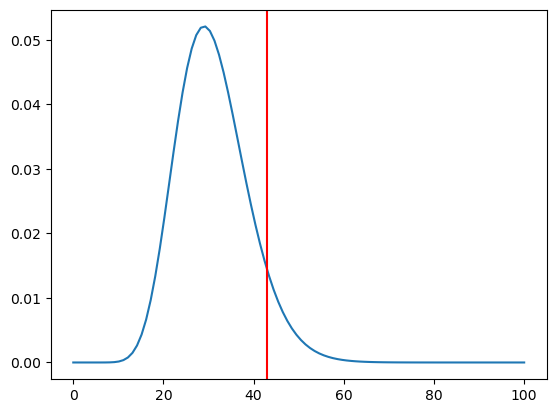

In [25]:
# plot the Chi-Square distribution (degrees of freedom n-1) with test statistic
x = np.linspace(0, 100, 100)
plt.plot(x, chi2.pdf(x, n-1))
plt.axvline(x = test_stat, c = 'r')
plt.show()

### Insight
As the p-value is greater than the significance level, we can not reject the null hypothesis. Hence, we do not have enough statistical evidence to conclude that the standard deviation of the chosen mutual fund is greater than the average standard deviation for mid-cap mutual funds at a 0.05 level of significance.

## **F-test for Equality of Variances**

### Let's revisit the example

The variance of a process is an important quality of the process. A large variance implies that the process needs better control and there is an opportunity to improve. 


The data (Bags.csv) includes weights for two different sets of bags manufactured from two different machines. It is assumed that the weights for two sets of bags follow a normal distribution.

Do we have enough statistical evidence at a 5% significance level to conclude that there is a significant difference between the variances of the bag weights for the two machines?

### Let's write the null hypothesis and alternative hypothesis
Let $\sigma_1^2, \sigma_2^2$ be the variances of weights of the bags produced by two different machines.

We will test the null hypothesis

>$H_0:\sigma_1^2 = \sigma_2^2$

against the alternate hypothesis

>$H_a:\sigma_1^2 \neq \sigma_2^2$

### Let's test whether the assumptions of the F-test are satisfied or not

* Continuous data - Yes, the weight is measured on a continuous scale.
* Normally distributed populations - Yes, it is assumed that the populations are normally distributed.
* Independent populations - As the two sets of bags are manufactured from two different machines, the populations are independent.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Let's have a look at the sample data

In [27]:
bagweight = pd.read_csv('data/Bags1.csv')
bagweight.head()

,Machine 1,Machine 2
0,2.95,3.22
1,3.45,3.30
2,3.50,3.34
3,3.75,3.28
4,3.48,3.29


### Let's find the p-value

In [28]:
# import the required function
from scipy.stats import f

# user-defined function to perform F-test
def f_test(x, y):
    x = np.array(x)
    y = np.array(y) 
    test_stat = np.var(x, ddof = 1)/np.var(y, ddof = 1) # calculate f-test statistic 
    dfn = x.size-1 # define degrees of freedom numerator 
    dfd = y.size-1 # define degrees of freedom denominator 
    p = (1 - f.cdf(test_stat, dfn, dfd)) # find p-value of f-test statistic 
    p1 = p*2 # converting one-tail to two-tail test 
    return(print("The p_value is {}" .format(round(p1,8)))) 

# perform f-test 
f_test(bagweight.dropna()['Machine 1'], bagweight.dropna()['Machine 2'])

The p_value is 5.1e-06


### Insight
As the p-value is much smaller than the level of significance, the null hypothesis can be rejected. Hence, we have enough statistical evidence to conclude that there is a difference between the bag weights for the two machines at a 0.05 significance level.

## **Chi-Square Test for Independence**

### Let's revisit the example

The beverage preference data for different age groups is given in the Beverage.csv file.

Do we have enough statistical evidence to conclude that beverage preference depends on age?



### Let's have a look at the sample data

In [29]:
beverage = pd.read_csv('data/Beverage.csv')
beverage.head()

,Age,Tea/Coffee,Soft Drink,Others
0,21 - 34,25,90,20
1,35 - 55,40,35,25
2,> 55,24,15,30


### Let's write the null hypothesis and alternative hypothesis


We will test the null hypothesis

>$H_0:$ Beverage preference is independent of age.

against the alternate hypothesis

>$H_a:$ Beverage preference depends on age.

### Let's test whether the assumptions of the Chi-Square test are satisfied or not

* Categorical variables - Yes
* The Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.


### Let's find the p-value

In [33]:
df = pd.DataFrame({'Male': [120, 60], 'Female': [100, 140]}, index = ['Smoker', 'Non-smoker'])
chi2, pval, dof, exp_freq = chi2_contingency(df)
print(pval)

6.425416071541024e-07


In [30]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(beverage.drop('Age', axis = 1))
print('The p-value is', p_value)

The p-value is 5.410957050304089e-10


In [32]:
chi2_contingency(beverage.drop('Age', axis = 1))

Chi2ContingencyResult(statistic=49.15840930376024, pvalue=5.410957050304089e-10, dof=4, expected_freq=array([[39.52302632, 62.17105263, 33.30592105],
       [29.27631579, 46.05263158, 24.67105263],
       [20.20065789, 31.77631579, 17.02302632]]))

### Insight
As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that beverage preference is not independent of age at a 5% significance level.

## **One-way Anova Test**

### Let's revisit the example

A traffic management inspector in a certain city wants to understand whether carbon emissions from different cars are different. The inspector has reasons to believe that fuel type may be the factor responsible for differences in carbon emission.

For this purpose, the inspector has taken random samples from all registered cars on the road in that city and would like to test if the amount of carbon emission released depends on fuel type at a 5% significance level.

### Let's have a look at the sample data

In [36]:
aovdata = pd.read_csv('data/AOVData.csv')
aovdata.head()

,Car_ID,manufacturer,fuel_type,co_emissions
0,1,Audi,Petrol,441.55
1,2,BMW,E85,376.47
2,3,BMW,E85,414.12
3,4,BMW,E85,351.41
4,5,Volvo,E85,284.59


Here, co_emissions is the response and fuel_type is the factor.

In [37]:
# get the levels of factor fuel_type
aovdata['fuel_type'].value_counts()

fuel_type
Petrol    179
LPG       170
E85       161
Name: count, dtype: int64

### Let's write the null hypothesis and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of carbon dioxide emissions for fuel type E85, LPG, and Petrol respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one carbon emission level is different from the rest.


fuel_type
E85       338.124534
LPG       363.744412
Petrol    371.722961
Name: co_emissions, dtype: float64


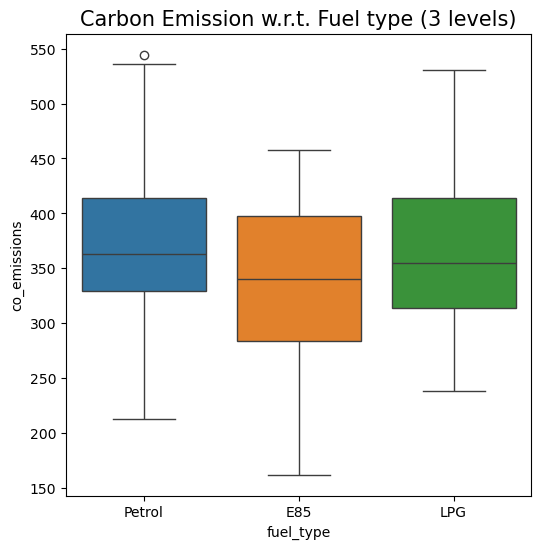

In [38]:
# mean of the carbon emission at different levels of the fuel_type factor
print(aovdata.groupby("fuel_type")["co_emissions"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x = "fuel_type", y = 'co_emissions' , data = aovdata, hue = 'fuel_type')
a.set_title("Carbon Emission w.r.t. Fuel type (3 levels)", fontsize = 15)
plt.show()

Now, the normality and equality variance assumptions need to be checked. 

* For testing normality, Shapiro-Wilk's test is applied to the response variable.

* For equality of variances, Levene's test is applied to the response variable.

### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ Carbon emission follows a normal distribution

against the alternative hypothesis

>$H_a:$ Carbon emission does not follow a normal distribution

In [39]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(aovdata['co_emissions']) 
print('The p-value is', p_value)

The p-value is 0.49750789999961853


Since the p-value of the test is very large, we fail to reject the null hypothesis that the response variable follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [40]:
# Assumption 2: Homogeneity of Variance
# import the required function
from scipy.stats import levene
statistic, p_value = levene(aovdata['co_emissions'][aovdata['fuel_type'] == "Petrol"], 
                            aovdata['co_emissions'][aovdata['fuel_type'] == "E85"], 
                            aovdata['co_emissions'][aovdata['fuel_type'] ==  "LPG"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.19437768490117


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

### Let's test whether the assumptions of Anova are satisfied or not

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using Levene's test.

### Let's find the p-value

In [41]:
# import the required function
from scipy.stats import f_oneway

# perform one-way Anova test
test_stat, p_value = f_oneway(aovdata.loc[aovdata['fuel_type'] == 'Petrol', 'co_emissions'],
                              aovdata.loc[aovdata['fuel_type'] == 'E85', 'co_emissions'],
                              aovdata.loc[aovdata['fuel_type'] == 'LPG', 'co_emissions'])
print('The p-value is ' + str(p_value))

The p-value is 8.274439764368132e-06


### Insight
As the p-value is much less than the significance level, we can reject the null hypothesis. Hence, we do have enough statistical evidence to conclude that at least one carbon emission level is different from the rest at a 5% significance level.

However, we don't know which mean is different from the rest or whether all pairs of means are different. Multiple comparison tests are used to test the differences between all pairs of means.

### Multiple Comparison test (Tukey HSD)

To identify which fuel type mean carbon emission is different from other groups, the null hypothesis is

  > $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$

against the alternative hypothesis

 > $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$

In [42]:
# import the required function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog = aovdata['co_emissions'], groups = aovdata['fuel_type'], alpha = 0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   E85    LPG  25.6199 0.0012  8.6843 42.5554   True
   E85 Petrol  33.5984    0.0 16.8712 50.3256   True
   LPG Petrol   7.9785 0.4916 -8.5139  24.471  False
----------------------------------------------------


### Insight

As the p-value for comparing the mean carbon emissions for the pair E85-LPG and E85-Petrol is less than the significance level, the null hypothesis of equality of all population means can be rejected.

Thus, we can say that the mean carbon emission for Petrol and LPG is similar but the emission for fuel type E85 is significantly different from LPG and Petrol.